#### Put Taxi  data dictionaries into HDFS

In [3]:
! hadoop fs -mkdir taxi_trip_data

In [10]:
! hadoop fs -ls taxi_trip_data/

Found 2 items
drwxr-xr-x   - tswde5bdhuser035 tswde5bdhuser035          0 2023-01-23 12:47 taxi_trip_data/Taxi_zone
drwxr-xr-x   - tswde5bdhuser035 tswde5bdhuser035          0 2023-01-23 12:46 taxi_trip_data/Yellow_tripdata


In [ ]:
! hadoop fs -mkdir taxi_trip_data/Yellow_tripdata

In [ ]:
! hadoop fs -mkdir taxi_trip_data/Taxi_zone

In [7]:
! hadoop fs -put /home/tswde5bdhuser035/yellow_tripdata_2020-12_DATASET/yellow_tripdata_2020-12.csv taxi_trip_data/Yellow_tripdata

In [9]:
! hadoop fs -put /home/tswde5bdhuser035/yellow_tripdata_2020-12_DATASET/taxi+_zone_lookup.csv taxi_trip_data/Taxi_zone

In [11]:
! hadoop fs -ls taxi_trip_data/Yellow_tripdata

Found 1 items
-rw-r--r--   3 tswde5bdhuser035 tswde5bdhuser035  134481400 2023-01-22 15:36 taxi_trip_data/Yellow_tripdata/yellow_tripdata_2020-12.csv


In [12]:
! hadoop fs -ls /user/tswde5bdhuser035/taxi_trip_data/Taxi_zone

Found 1 items
-rw-r--r--   3 tswde5bdhuser035 tswde5bdhuser035      12322 2023-01-22 15:37 /user/tswde5bdhuser035/taxi_trip_data/Taxi_zone/taxi+_zone_lookup.csv


#### Create SparkSession

In [104]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

#### Load taxi_trip_data into a DataFrame

In [105]:
Yellow_taxi_trip_data_path = '/user/tswde5bdhuser035/taxi_trip_data/Yellow_tripdata'

In [106]:
Zone_taxi_trip_data_path = '/user/tswde5bdhuser035/taxi_trip_data/Taxi_zone'

In [107]:
Yellow_taxi_trip_DF = spark.read.csv(Yellow_taxi_trip_data_path)

In [108]:
Zone_taxi_trip_DF = spark.read.csv(Zone_taxi_trip_data_path)

#### Print the schema

In [109]:
Yellow_taxi_trip_DF.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)



In [110]:
Yellow_taxi_trip_DF.show()

+--------+--------------------+--------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+--------------------+------------+--------------------+
|     _c0|                 _c1|                 _c2|            _c3|          _c4|       _c5|               _c6|         _c7|         _c8|         _c9|       _c10| _c11|   _c12|      _c13|        _c14|                _c15|        _c16|                _c17|
+--------+--------------------+--------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+--------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_date...|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surch...|total_a

#### Define the schema of the dataset

In [111]:
from pyspark.sql.types import *

In [112]:
Schema=StructType([
    StructField('VendorID',IntegerType(),nullable=True),
    StructField('tpep_pickup_datetime',TimestampType(),nullable=True),
    StructField('tpep_dropoff_datetime',TimestampType(),nullable=True),
    StructField('passenger_count',IntegerType(),nullable=True),
    StructField('trip_distance',FloatType(),nullable=True),
    StructField('RatecodeID',IntegerType(),nullable=True),
    StructField('store_and_fwd_flag',StringType(),nullable=True),
    StructField('PULocationID',IntegerType(),nullable=True),
    StructField('DOLocationID',IntegerType(),nullable=True),
    StructField('payment_type',IntegerType(),nullable=True),
    StructField('fare_amount',FloatType(),nullable=True),
    StructField('extra',FloatType(),nullable=True),
    StructField('mta_tax',FloatType(),nullable=True),
    StructField('tip_amount',FloatType(),nullable=True),
    StructField('tolls_amount',FloatType(),nullable=True),
    StructField('improvement_surcharge',FloatType(),nullable=True),
    StructField('total_amount',FloatType(),nullable=True),
    StructField('congestion_surcharge',FloatType(),nullable=True)
]
)

In [113]:
df = spark.read.option('header',True).schema(Schema).csv('/user/tswde5bdhuser035/taxi_trip_data/Yellow_tripdata/yellow_tripdata_2020-12.csv')

In [114]:
df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1| 2020-12-01 00:07:13|  2020-12-01 00:18:12|              1|          7.6|         1|                 N|         138|         263|           1|       21.5|  3.0|    0.5|       2.5|        6.12|                  0.3

In [115]:
df.dtypes

[('VendorID', 'int'),
 ('tpep_pickup_datetime', 'timestamp'),
 ('tpep_dropoff_datetime', 'timestamp'),
 ('passenger_count', 'int'),
 ('trip_distance', 'float'),
 ('RatecodeID', 'int'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'int'),
 ('DOLocationID', 'int'),
 ('payment_type', 'int'),
 ('fare_amount', 'float'),
 ('extra', 'float'),
 ('mta_tax', 'float'),
 ('tip_amount', 'float'),
 ('tolls_amount', 'float'),
 ('improvement_surcharge', 'float'),
 ('total_amount', 'float'),
 ('congestion_surcharge', 'float')]

In [116]:
df.count()

1461897

#### Data Cleansing 

1.Trip distance is less than or equal to zero 
2.Total amount i.e. fare is less than or equal to zero
3.Trip duration is less than or equal to zero Or alternatively if the Drop Off timestamp is less than the Pick Up timestamp


In [117]:
df = spark.read.option('header',True).option('mode','DROPMALFORMED').csv('/user/tswde5bdhuser035/taxi_trip_data/Yellow_tripdata/yellow_tripdata_2020-12.csv')

In [118]:
df.count()

1461897

In [119]:
df.fillna(value=0)

DataFrame[VendorID: string, tpep_pickup_datetime: string, tpep_dropoff_datetime: string, passenger_count: string, trip_distance: string, RatecodeID: string, store_and_fwd_flag: string, PULocationID: string, DOLocationID: string, payment_type: string, fare_amount: string, extra: string, mta_tax: string, tip_amount: string, tolls_amount: string, improvement_surcharge: string, total_amount: string, congestion_surcharge: string]

In [120]:
df.count()

1461897

In [121]:
df_filtered = df.filter(df.trip_distance > 0)
df_filtered.count()

1095708

In [122]:
df_filtered2 = df_filtered.filter(df_filtered.total_amount > 0)
df_filtered2.count()

1092613

In [123]:
df_filtered3 = df_filtered2.filter(df_filtered2.tpep_dropoff_datetime > df_filtered2.tpep_pickup_datetime)
df_filtered3.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1| 2020-12-01 00:07:13|  2020-12-01 00:18:12|              1|         7.60|         1|                 N|         138|         263|           1|       21.5|    3|    0.5|       2.5|        6.12|                  0.3

In [124]:
df_filtered3.count()

1087470

#### Data Augmentation : adding a few derived fields 

1.Extract the day of week (i.e. Sunday, Monday etc.) from the pick up timestamp and add it as a column
It helps to add the ordinal number such as 1 for Sunday, 2 for Monday and so on for sorting the data for display

In [125]:
from pyspark.sql.functions import *
df_aug1=df_filtered3.withColumn("tpep_pickup_datetime",to_timestamp(col("tpep_pickup_datetime"))).withColumn("week_day_number", date_format(col("tpep_pickup_datetime"), "u")).withColumn("week_day_abb", date_format(col("tpep_pickup_datetime"), "E"))
df_aug1.show(truncate=False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|week_day_number|week_day_abb|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+
|1       |2020-12-01 00:07:13 |2020-12-01 00:18:12  |1              |7.60         |1         |N                 |138         |263       

Calculate and add the trip duration in minutes by subtracting the pick up timestamp from the drop off timestamp


In [126]:
df_aug2=df_aug1.withColumn('DiffInMinutes',round((unix_timestamp("tpep_dropoff_datetime") - unix_timestamp('tpep_pickup_datetime'))/60))
  
df_aug2.show(truncate=False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+-------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|week_day_number|week_day_abb|DiffInMinutes|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+-------------+
|1       |2020-12-01 00:07:13 |2020-12-01 00:18:12  |1              |7.60         |1         |

Pick up hour of the day can be extracted and added to the fields

In [127]:
df_aug3=df_aug2.withColumn('PickUpHour',hour(col("tpep_pickup_datetime")))
df_aug3.show(truncate=False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+-------------+----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|week_day_number|week_day_abb|DiffInMinutes|PickUpHour|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+-------------+----------+
|1       |2020-12-01 00:07:13 |2020-12-01 00:18:12  |1       

Look up the Taxi Zone data and add the corresponding Zone names of Pick Up Location Id and Drop Off Location Id


In [128]:
Schema_Taxi_Zone=StructType([
    StructField('LocationID',IntegerType(),nullable=True),
    StructField('Borough',StringType(),nullable=True),
    StructField('Zone',StringType(),nullable=True),
    StructField('service_zone',StringType(),nullable=True),
]
)

In [129]:
df_TZ = spark.read.option('header',True).schema(Schema_Taxi_Zone).csv('/user/tswde5bdhuser035/taxi_trip_data/Taxi_zone/taxi+_zone_lookup.csv')

In [130]:
df_aug4=df_aug3.join(df_TZ,df_aug3.PULocationID == df_TZ.LocationID).drop("LocationID","Borough","service_zone").withColumnRenamed("Zone","PickUpZone")
df_aug4.show(truncate=False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+-------------+----------+---------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|week_day_number|week_day_abb|DiffInMinutes|PickUpHour|PickUpZone           |
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+-------------+----------+------------------

In [131]:
df_aug4.count()

1087470

In [132]:
df_aug5=df_aug4.join(df_TZ,df_aug4.DOLocationID == df_TZ.LocationID).drop("LocationID","Borough","service_zone").withColumnRenamed("Zone","DropOffZone")
df_aug5.show(truncate=False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+------------+-------------+----------+---------------------+---------------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|week_day_number|week_day_abb|DiffInMinutes|PickUpHour|PickUpZone           |DropOffZone                |
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---------------+

#### Register dataframe to table

In [133]:
df_aug5.registerTempTable("TripData")

#### Reports:

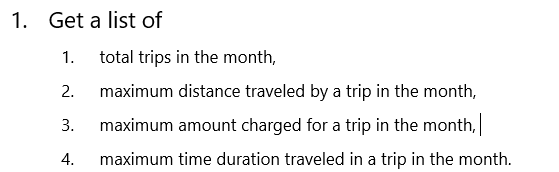

In [134]:
sql_result1 = spark.sql(
    "SELECT DISTINCT(MONTH(tpep_pickup_datetime)) AS Month,COUNT(VendorID) AS TotalTrips,MAX(trip_distance) AS MaxDistance,MAX(total_amount) AS MaxAmount,MAX(DiffInMinutes) AS MaxTimeDuration FROM TripData GROUP BY MONTH(tpep_pickup_datetime) ORDER BY Month"
)


sql_result1.show()

+-----+----------+-----------+---------+---------------+
|Month|TotalTrips|MaxDistance|MaxAmount|MaxTimeDuration|
+-----+----------+-----------+---------+---------------+
|    1|         4|       9.74|     32.3|           31.0|
|    2|         4|       2.85|    18.36|          434.0|
|    4|         3|       5.91|     23.3|          439.0|
|    5|         1|       1.14|      9.8|            6.0|
|    6|         1|       5.85|     31.4|           31.0|
|   11|        11|       9.13|     47.3|         1401.0|
|   12|   1002408|      97.73|    99.96|         2714.0|
+-----+----------+-----------+---------+---------------+



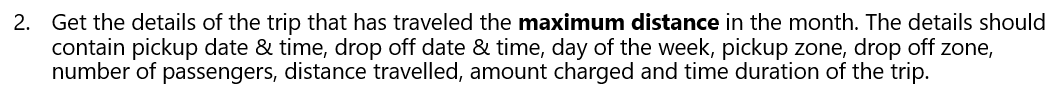

In [135]:
sql_result2 = spark.sql("""

with cte as
    (
        SELECT MONTH(tpep_pickup_datetime) AS Month,MAX(trip_distance) AS Distance FROM TripData GROUP BY MONTH(tpep_pickup_datetime) ORDER BY Month
    )
SELECT t.tpep_pickup_datetime as Pickup_Datetime,t.tpep_dropoff_datetime as Dropoff_Datetime,t.PickUpZone,t.DropOffZone,t.passenger_count,t.trip_distance,t.total_amount,t.DiffInMinutes as TimeDuration  FROM TripData t
JOIN cte ON t.trip_distance=cte.Distance AND MONTH(t.tpep_pickup_datetime) = cte.Month

"""
       
)

sql_result2.show()

+-------------------+-------------------+--------------------+--------------------+---------------+-------------+------------+------------+
|    Pickup_Datetime|   Dropoff_Datetime|          PickUpZone|         DropOffZone|passenger_count|trip_distance|total_amount|TimeDuration|
+-------------------+-------------------+--------------------+--------------------+---------------+-------------+------------+------------+
|2021-01-01 00:10:00|2021-01-01 00:30:47|        East Chelsea|Washington Height...|              1|         9.74|        32.3|        21.0|
|2021-04-28 18:43:30|2021-04-29 02:02:52|         Murray Hill|Financial Distric...|              1|         5.91|        23.3|       439.0|
|2020-11-30 18:31:24|2020-11-30 18:47:21|   LaGuardia Airport|        East Village|              1|         9.13|        30.3|        16.0|
|2021-05-20 02:40:50|2021-05-20 02:47:10|   Battery Park City|Financial Distric...|              1|         1.14|         9.8|         6.0|
|2021-02-02 08:54:06

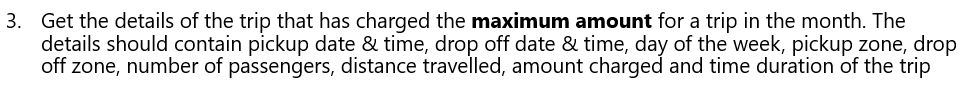

In [136]:
sql_result3 = spark.sql("""

with cte as
    (
        SELECT MONTH(tpep_pickup_datetime) AS Month,MAX(total_amount) AS Amount FROM TripData GROUP BY MONTH(tpep_pickup_datetime) ORDER BY Month
    )
SELECT t.tpep_pickup_datetime as Pickup_Datetime,t.tpep_dropoff_datetime as Dropoff_Datetime,t.PickUpZone,t.DropOffZone,t.passenger_count,t.trip_distance,t.total_amount,t.DiffInMinutes as TimeDuration  FROM TripData t
JOIN cte ON t.total_amount=cte.Amount AND MONTH(t.tpep_pickup_datetime) = cte.Month

"""
       
)

sql_result3.show()

+-------------------+-------------------+--------------------+--------------------+---------------+-------------+------------+------------+
|    Pickup_Datetime|   Dropoff_Datetime|          PickUpZone|         DropOffZone|passenger_count|trip_distance|total_amount|TimeDuration|
+-------------------+-------------------+--------------------+--------------------+---------------+-------------+------------+------------+
|2020-11-30 23:36:21|2020-11-30 23:57:45|   LaGuardia Airport| Lincoln Square East|              1|        10.07|        47.3|        21.0|
|2021-06-10 10:10:48|2021-06-10 10:41:42|   Battery Park City|Upper West Side S...|              1|         5.85|        31.4|        31.0|
|2020-12-01 17:25:32|2020-12-01 18:36:58|Upper East Side S...|     Hammels/Arverne|              1|        30.92|       99.96|        71.0|
|2020-12-10 17:46:37|2020-12-10 19:15:29|                  NV|     Hammels/Arverne|              1|        27.09|       99.96|        89.0|
|2021-02-02 08:54:06

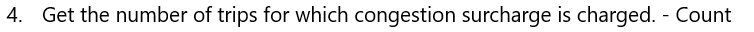

In [137]:
sql_result4 = spark.sql("""

SELECT count(VendorID) AS Count FROM TripData WHERE (congestion_surcharge = 0.75 OR congestion_surcharge = 2.5)


"""
       
)

sql_result4.show()

+------+
| Count|
+------+
|925970|
+------+



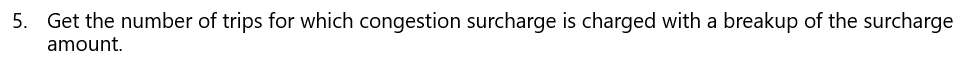

In [138]:
sql_result5 = spark.sql("""

SELECT count(VendorID) AS Count FROM TripData 
WHERE improvement_surcharge = 0.3 AND (congestion_surcharge = 0.75 OR congestion_surcharge = 2.5)

"""
       
)

sql_result5.show()

+------+
| Count|
+------+
|925953|
+------+



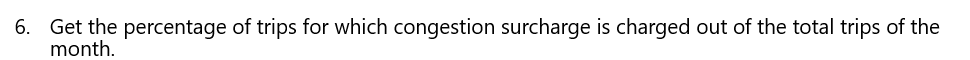

In [139]:
sql_result6 = spark.sql("""


SELECT count(VendorID) * 100 /(SELECT count(VendorID) FROM TripData) AS Percentage FROM TripData WHERE (congestion_surcharge = 0.75 OR congestion_surcharge = 2.5)


"""
       
)

sql_result6.show()

+-----------------+
|       Percentage|
+-----------------+
|92.37235044372088|
+-----------------+



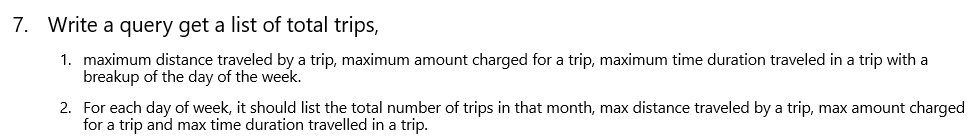

In [149]:
sql_result7_1 = spark.sql("""

  SELECT week_day_abb,MAX(trip_distance) AS MaxDistance,MAX(total_amount) AS MaxAmount,MAX(DiffInMinutes) AS MaxTimeDuration FROM TripData GROUP BY week_day_abb


"""
)  


sql_result7_1.show()

+------------+-----------+---------+---------------+
|week_day_abb|MaxDistance|MaxAmount|MaxTimeDuration|
+------------+-----------+---------+---------------+
|         Sun|      97.73|     99.8|         1439.0|
|         Mon|       9.99|     99.9|         1440.0|
|         Thu|       9.99|    99.96|         2714.0|
|         Sat|      95.10|    99.67|         1440.0|
|         Wed|       9.99|    99.92|         1439.0|
|         Fri|   94098.46|    99.92|         1440.0|
|         Tue|      94.81|    99.96|         1439.0|
+------------+-----------+---------+---------------+



In [153]:
sql_result7_2 = spark.sql("""

  SELECT DISTINCT(MONTH(tpep_pickup_datetime)) AS Month,COUNT(VendorID) AS TotalTrips,week_day_abb AS WeekDay,MAX(trip_distance) AS MaxDistance,MAX(total_amount) AS MaxAmount,MAX(DiffInMinutes) AS MaxTimeDuration FROM TripData GROUP BY MONTH(tpep_pickup_datetime),week_day_abb ORDER BY Month


"""
)  


sql_result7_2.show()

+-----+----------+-------+-----------+---------+---------------+
|Month|TotalTrips|WeekDay|MaxDistance|MaxAmount|MaxTimeDuration|
+-----+----------+-------+-----------+---------+---------------+
|    1|         2|    Thu|       9.36|     29.3|           31.0|
|    1|         1|    Wed|       1.56|    14.76|            9.0|
|    1|         1|    Fri|       9.74|     32.3|           21.0|
|    2|         2|    Tue|       2.85|    18.36|          434.0|
|    2|         2|    Wed|       1.49|    14.16|            8.0|
|    4|         3|    Wed|       5.91|     23.3|          439.0|
|    5|         1|    Thu|       1.14|      9.8|            6.0|
|    6|         1|    Thu|       5.85|     31.4|           31.0|
|   11|        11|    Mon|       9.13|     47.3|         1401.0|
|   12|    186145|    Tue|      94.81|    99.96|         1439.0|
|   12|    135216|    Fri|   94098.46|    99.92|         1440.0|
|   12|     95902|    Sun|      97.73|     99.8|         1439.0|
|   12|    114887|    Sat

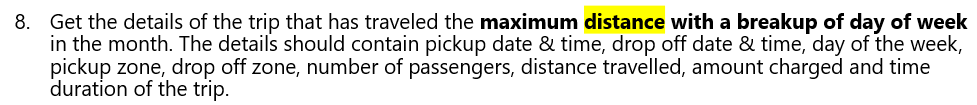

In [156]:
sql_result8 = spark.sql("""

with cte as
    (
        SELECT week_day_abb AS WeekDay,MAX(trip_distance) AS Distance FROM TripData GROUP BY week_day_abb
    )
SELECT t.tpep_pickup_datetime as Pickup_Datetime,t.tpep_dropoff_datetime as Dropoff_Datetime,t.week_day_abb,t.PickUpZone,t.DropOffZone,t.passenger_count,t.trip_distance,t.total_amount,t.DiffInMinutes as TimeDuration  FROM TripData t
JOIN cte ON t.trip_distance=cte.Distance AND t.week_day_abb = cte.WeekDay

"""
       
)

sql_result8.show()

+-------------------+-------------------+------------+--------------------+--------------------+---------------+-------------+------------+------------+
|    Pickup_Datetime|   Dropoff_Datetime|week_day_abb|          PickUpZone|         DropOffZone|passenger_count|trip_distance|total_amount|TimeDuration|
+-------------------+-------------------+------------+--------------------+--------------------+---------------+-------------+------------+------------+
|2020-12-26 17:48:38|2020-12-26 19:21:32|         Sat|         JFK Airport|                  NA|              1|        95.10|      461.67|        93.0|
|2020-12-07 22:06:06|2020-12-07 22:37:28|         Mon|        Midtown East|Flatbush/Ditmas Park|              2|         9.99|        36.3|        31.0|
|2020-12-14 06:06:01|2020-12-14 06:24:55|         Mon|    Garment District|   LaGuardia Airport|              4|         9.99|       37.92|        19.0|
|2020-12-14 23:01:44|2020-12-14 23:20:05|         Mon|   LaGuardia Airport|Washing

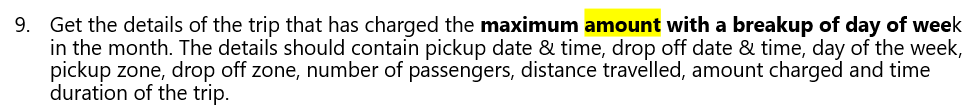

In [157]:
sql_result9 = spark.sql("""

with cte as
    (
        SELECT week_day_abb AS WeekDay,MAX(total_amount) AS Amount FROM TripData GROUP BY week_day_abb
    )
SELECT t.tpep_pickup_datetime as Pickup_Datetime,t.tpep_dropoff_datetime as Dropoff_Datetime,t.week_day_abb,t.PickUpZone,t.DropOffZone,t.passenger_count,t.trip_distance,t.total_amount,t.DiffInMinutes as TimeDuration  FROM TripData t
JOIN cte ON t.total_amount=cte.Amount AND t.week_day_abb = cte.WeekDay

"""
       
)

sql_result9.show()

+-------------------+-------------------+------------+--------------------+--------------------+---------------+-------------+------------+------------+
|    Pickup_Datetime|   Dropoff_Datetime|week_day_abb|          PickUpZone|         DropOffZone|passenger_count|trip_distance|total_amount|TimeDuration|
+-------------------+-------------------+------------+--------------------+--------------------+---------------+-------------+------------+------------+
|2020-12-30 12:57:58|2020-12-30 14:09:06|         Wed|        West Village|         JFK Airport|              1|        32.18|       99.92|        71.0|
|2020-12-12 00:45:36|2020-12-12 01:28:17|         Sat|        Coney Island|Van Cortlandt Vil...|              1|        34.00|       99.67|        43.0|
|2020-12-06 12:50:26|2020-12-06 13:21:53|         Sun|        Central Park|      Newark Airport|              1|        18.10|        99.8|        31.0|
|2020-12-01 17:25:32|2020-12-01 18:36:58|         Tue|Upper East Side S...|     Ha

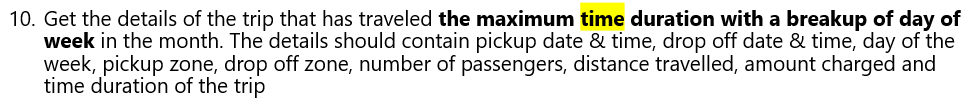

In [158]:
sql_result10 = spark.sql("""

with cte as
    (
        SELECT week_day_abb AS WeekDay,MAX(DiffInMinutes) AS TimeDuration FROM TripData GROUP BY week_day_abb
    )
SELECT t.tpep_pickup_datetime as Pickup_Datetime,t.tpep_dropoff_datetime as Dropoff_Datetime,t.week_day_abb,t.PickUpZone,t.DropOffZone,t.passenger_count,t.trip_distance,t.total_amount,t.DiffInMinutes as TimeDuration  FROM TripData t
JOIN cte ON t.DiffInMinutes=cte.TimeDuration AND t.week_day_abb = cte.WeekDay

"""
       
)

sql_result10.show()

+-------------------+-------------------+------------+--------------------+--------------------+---------------+-------------+------------+------------+
|    Pickup_Datetime|   Dropoff_Datetime|week_day_abb|          PickUpZone|         DropOffZone|passenger_count|trip_distance|total_amount|TimeDuration|
+-------------------+-------------------+------------+--------------------+--------------------+---------------+-------------+------------+------------+
|2020-12-14 10:29:14|2020-12-15 10:28:49|         Mon|Upper West Side S...|Upper East Side S...|              5|         1.48|       14.12|      1440.0|
|2020-12-09 16:42:25|2020-12-10 16:41:20|         Wed|                  NV|                  NV|              1|         5.97|       33.96|      1439.0|
|2020-12-23 07:19:35|2020-12-24 07:18:46|         Wed| Little Italy/NoLiTa|   East Harlem South|              1|         7.00|        39.3|      1439.0|
|2020-12-30 15:46:01|2020-12-31 15:44:53|         Wed|Upper East Side S...| Little